## Bank Marketing Project Part 1: Data Exploratory and Cleaning 

### Data Set Information 
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. More than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

The dataset contains 45211 instances and 17 features, 7 of them are numerical variables and the rest are categorical variables. A binary target variable y reveals information about whether the client subscribed to a term deposit or not (binary: “yes”, “no”). Source: http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#

### The Goal for This Notebook: Data Exploratory and Cleaning
I plan to carry out an exploratory analysis to understand the data and to obtain some insights that would help me to make further decision on how to preprocess the data.

### Methodology
1. Explore the numeric attributes with visualizations and quantitative tables
2. Explore the categorical attributes with visualizations and quantitative tables
3. Remove outliers for numerical attributes
4. Replace the "unknow" category placeholder with the mode value
5. Data transformation
6. Split the data in 80%,20% for future modeling building work



### Attributes Information

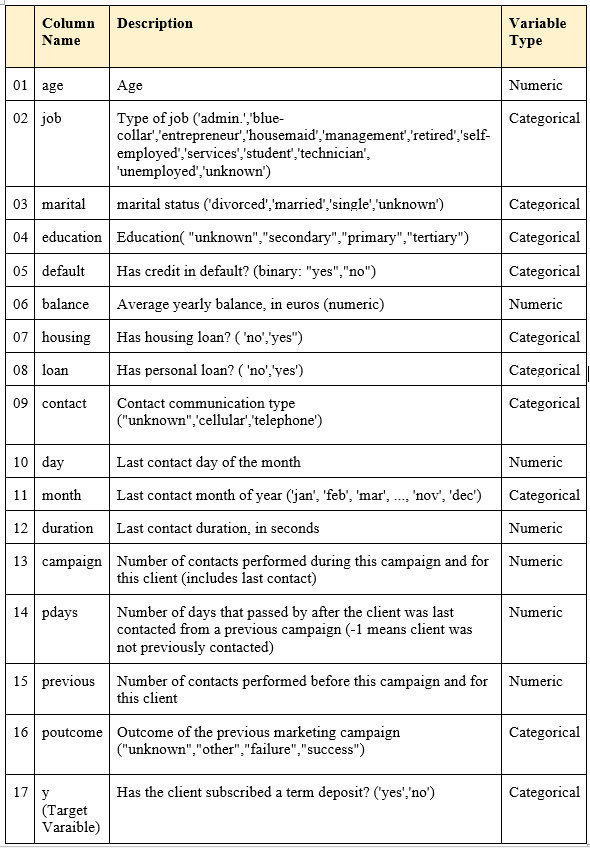

In [1]:
from IPython.display import Image
Image(filename='478 FInal pj attribute.png')

### Exploratory Analysis

*Summary: Clients with these features would have a higher rate to subscribe a term deposit
1.	Clients with higher yearly balance (larger than 1303 euro), clients that were contacted with longer duration (more than 3.5 minutes), and clients that were contacted again after 2 months.
2.	Clients who are retired and unemployed or clients who are students
3.	Clients who are single 
4.	Clients who have tertiary education background 
5.	Clients with no hosing loan and no personal loan
6.	When the last contacted months are March, December, and September 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#load data set
bank=pd.read_csv("C:/Users/Rai Chiang/Desktop/DePaul Course/CSC478/final project/bank-full.csv",delimiter=";",
                 dtype="string")

In [5]:
print bank.info()

bank.age=bank.age.astype("int")
bank.balance=bank.balance.astype("int")
bank.day=bank.day.astype("int")
bank.duration=bank.duration.astype("int")
bank.campaign=bank.campaign.astype("int")
bank.pdays=bank.pdays.astype("int")
bank.previous=bank.previous.astype("int")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null object
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null object
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null object
month        45211 non-null object
duration     45211 non-null object
campaign     45211 non-null object
pdays        45211 non-null object
previous     45211 non-null object
poutcome     45211 non-null object
y            45211 non-null object
dtypes: object(17)
memory usage: 5.9+ MB
None


### 1. Explore the numerical attributes
To learn more about the dataset, I first explored the data by learning their distribution and plotted them on the box-plots to detect whether there are any outliers exist.

In [36]:
#create a fucntion to find the distribution of the numerical variables
def box_plot(attribute):
    bank[[attribute]].describe().drop(["count"],axis=0).boxplot()
    plt.show()
    

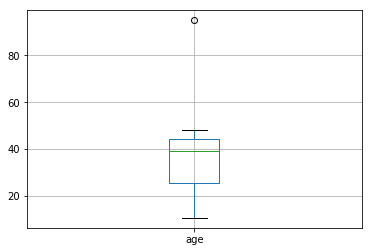

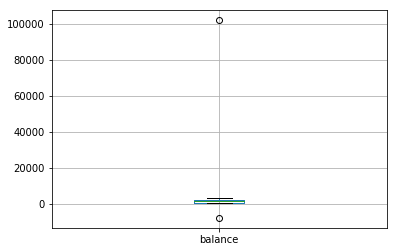

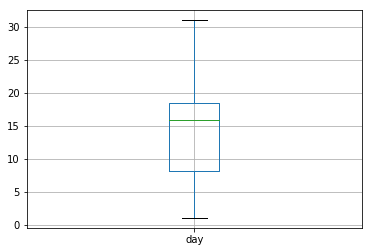

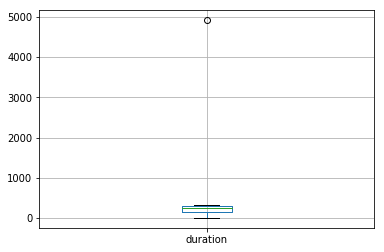

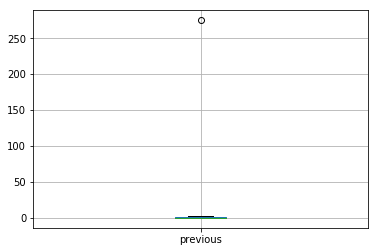

In [41]:
box_plot("age")
box_plot("balance")
box_plot("day")
box_plot("duration")
box_plot("previous")

In [44]:
bank[["age","balance","day","duration","pdays","previous"]].describe().round(0)

,age,balance,day,duration,pdays,previous
count,45211.0,45211.0,45211.0,45211.0,45211.0,45211.0
mean,41.0,1362.0,16.0,258.0,40.0,1.0
std,11.0,3045.0,8.0,258.0,100.0,2.0
min,18.0,-8019.0,1.0,0.0,-1.0,0.0
25%,33.0,72.0,8.0,103.0,-1.0,0.0
50%,39.0,448.0,16.0,180.0,-1.0,0.0
75%,48.0,1428.0,21.0,319.0,-1.0,0.0
max,95.0,102127.0,31.0,4918.0,871.0,275.0


#### With the plots and table above, I find that features such as age, balance, duration, pdays and previous all have outliers. 
---

In [877]:
#The average values of numerical variables for different Y values
print "The average values of numerical variables for different Y values\n"
bank.pivot_table(["age","balance","day","duration","pdays","previous"],["y"],aggfunc="mean")

The average values of numerical variables for different Y values



,age,balance,day,duration,pdays,previous
y,,,,,,
no,40.838986,1303.714969,15.892290,221.182806,36.421372,0.502154
yes,41.670070,1804.267915,15.158253,537.294574,68.702968,1.170354


#### The table above displays the numerical variables with their average values versus different y values.
It seems that the attribute balance, duration and pddays have a significant difference in the average values for different y values, which suggests that these 3 kinds of clients have a higher rate to subscribe a term deposit.

1. clients with higher yearly balance (larger than 1303 euro), 
2. clients that were contacted with longer duration(more than 3.5 minutes), 
3. clients that were contacted again after 2 months  



### 2. Explore the categorical attributes

           count unique          top   freq
job        45211     12  blue-collar   9732
marital    45211      3      married  27214
education  45211      4    secondary  23202
default    45211      2           no  44396
housing    45211      2          yes  25130
loan       45211      2           no  37967
contact    45211      3     cellular  29285
month      45211     12          may  13766
poutcome   45211      4      unknown  36959


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44]),
 <a list of 44 Text xticklabel objects>)

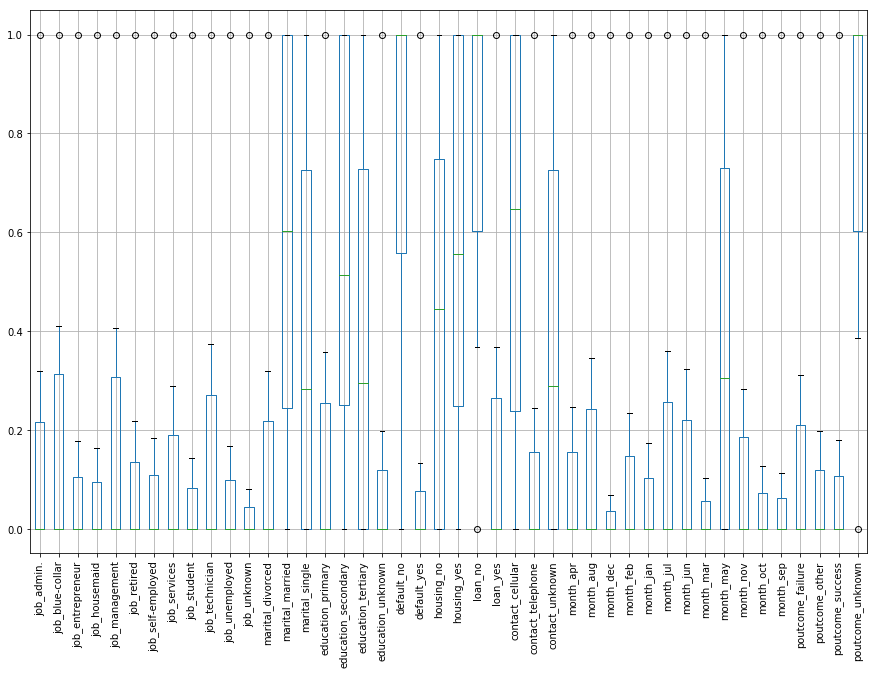

In [46]:
#categorical variables distribution

print bank[["job","marital","education","default","housing","loan",
            "contact","month","campaign","poutcome"]].describe(include="object").T

categorical=pd.get_dummies(bank[["job","marital","education","default","housing",
                                 "loan","contact","month","poutcome"]]).describe().T

categorical.drop("count",axis=1).T.boxplot(figsize=(15,10))
plt.xticks(rotation='vertical')



### Visualizations for the above information: 3 graphs are ploted for each attribute
1. The attribute distribution 
2. The job category distribution for 2 categories of target y (yes/no)
3. The distribution of target y for different attriute category

With the second plot and its quantity table, we are able to learn the top 3 categories within the attribute that are willing to subscribe the product. However, a lot of time the top-ranked categories are those that dominate the attribute distribution (the first plot). Therefore, to rank the top categories that are willing to subscribe the product it would be reasonable to also consider the ratio of the number of clients who subscribe the product to the total number of clients in that specific attribute category (the third plot).



In [27]:
#create a fuction to explore the categorical variables

def plot(attribute_category):
    attribute_category.value_counts().plot(kind="bar")
    plt.title("attribute distribution")
    plt.show()
    print("\n")

    pd.crosstab(attribute_category,bank.y).T.plot(kind="bar",stacked = True)
    plt.legend(bbox_to_anchor=(1.0, 0.5))
    plt.title("The ratio of  attribute category to y category (yes/no)")
    plt.show()
    print("[Each column sums up to 1] ")
    print pd.crosstab(attribute_category,bank.y,normalize="columns")
    print("\n\n\n")

    pd.crosstab(attribute_category,bank.y).plot(kind="bar",stacked = True)
    plt.title("The ratio of y category (yes/no) to attribute category")
    plt.show()
    print("[Each row sums up to 1]")
    print pd.crosstab(attribute_category,bank.y,normalize="index")

### Explore the job attribute

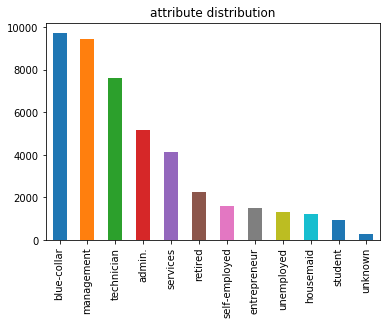

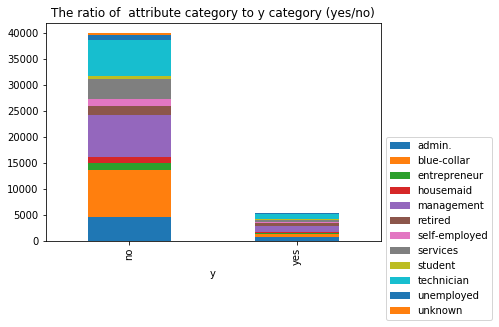

[Each column sums up to 1] 
y                    no       yes
job                              
admin.         0.113722  0.119304
blue-collar    0.226041  0.133863
entrepreneur   0.034167  0.023256
housemaid      0.028330  0.020609
management     0.204323  0.245982
retired        0.043785  0.097561
self-employed  0.034868  0.035356
services       0.094810  0.069767
student        0.016758  0.050860
technician     0.169255  0.158820
unemployed     0.027579  0.038192
unknown        0.006362  0.006428






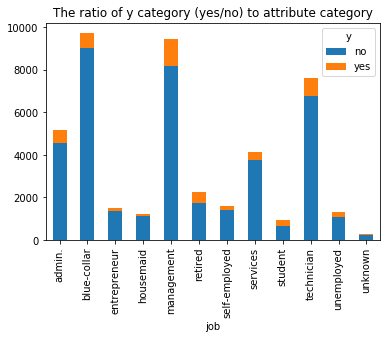

[Each row sums up to 1]
y                    no       yes
job                              
admin.         0.877973  0.122027
blue-collar    0.927250  0.072750
entrepreneur   0.917283  0.082717
housemaid      0.912097  0.087903
management     0.862444  0.137556
retired        0.772085  0.227915
self-employed  0.881571  0.118429
services       0.911170  0.088830
student        0.713220  0.286780
technician     0.889430  0.110570
unemployed     0.844973  0.155027
unknown        0.881944  0.118056


In [28]:
plot(bank.job)

#### With the second plot and its quantity table below, we are able to learn that the top 3 occupations willing to subscribe the product are management, technician and blue-collar. However, according to the attribute distribution plot (the first plot), because these 3 occupations are dominating the job attribute, it is not surprising that they have the highest rank among all for the yes category of the target variable.

#### Therefore, to rank the top jobs that are willing to subscribe the product it would be reasonable to also consider the ratio of the number of clients who subscribe the product to the total number of clients in that specific job category (third plot). In this case, student (ratio=0.286), retired(ratio=0.227) and unemployed(ratio=0.155)
---

### Explore the marital attribute

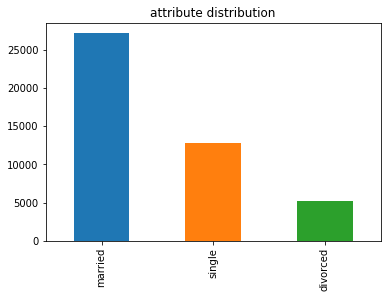

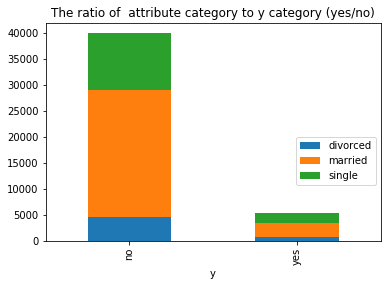

[Each column sums up to 1] 
y               no       yes
marital                     
divorced  0.114849  0.117603
married   0.612670  0.520892
single    0.272481  0.361505






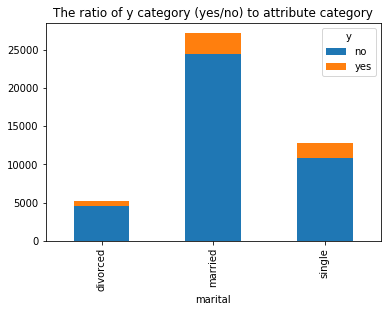

[Each row sums up to 1]
y               no       yes
marital                     
divorced  0.880545  0.119455
married   0.898765  0.101235
single    0.850508  0.149492


In [29]:
plot(bank.marital)

#### If we just merely look at the distribution for the clients who subscribe the product, we would think that the clients who are married are more willing to subscribe (The second plot), which is not surprising since the majority of the clients are married. But if we look at the yes and no distribution corresponding to each category (The third plot), we would find that the clients who are single are the group that provides the highest subscribe rate among all
---

### Explore the education attribute

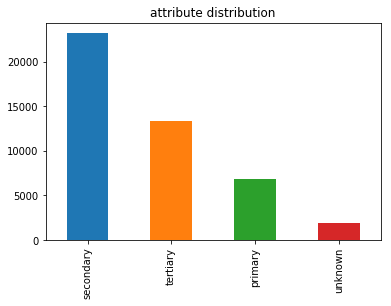

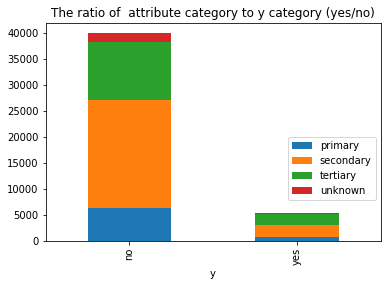

[Each column sums up to 1] 
y                no       yes
education                    
primary    0.156806  0.111741
secondary  0.519814  0.463226
tertiary   0.283177  0.377387
unknown    0.040203  0.047646






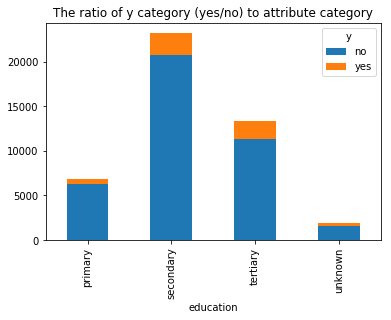

[Each row sums up to 1]
y                no       yes
education                    
primary    0.913735  0.086265
secondary  0.894406  0.105594
tertiary   0.849936  0.150064
unknown    0.864297  0.135703


In [30]:
plot(bank.education)

#### If we just merely look at the distribution for the clients who subscribe the product(second plot), we would think that the clients who have secondary and tertiary education background are more willing to subscribe(The second plot),But if we look at the yes and no distribution corresponding to each category (The third plot), we would find that the clients who have tertiary and unknown education background are the groups that provides the highest subscribe rate among all.
---

### Explore the housing loan attribute

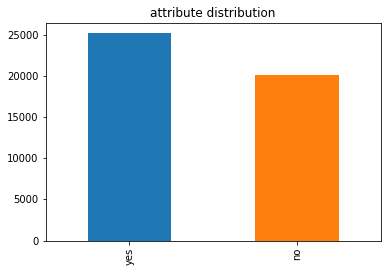

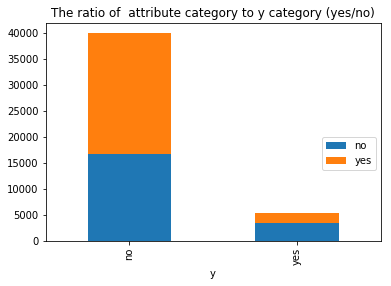

[Each column sums up to 1] 
y              no       yes
housing                    
no       0.418992  0.634146
yes      0.581008  0.365854






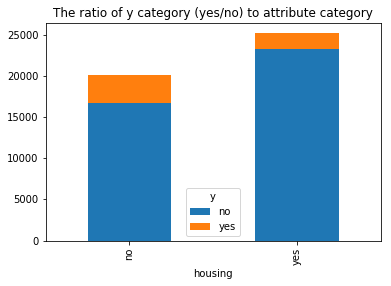

[Each row sums up to 1]
y              no       yes
housing                    
no       0.832976  0.167024
yes      0.923000  0.077000


In [31]:
plot(bank.housing)

#### With the visualizations and quantity tables above, the clients with no hosing loan are more willing to subscibe the product
---

### Explore the person loan attribute

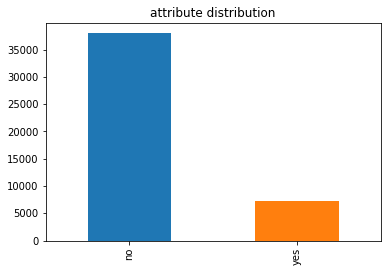

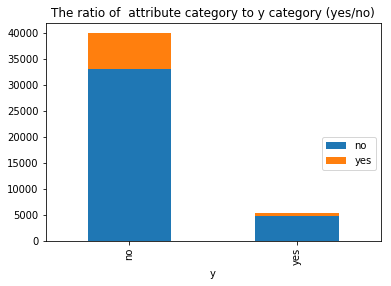

[Each column sums up to 1] 
y          no       yes
loan                   
no    0.83067  0.908489
yes   0.16933  0.091511






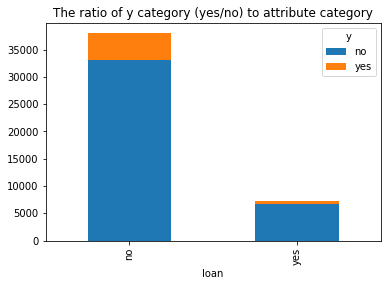

[Each row sums up to 1]
y           no       yes
loan                    
no    0.873443  0.126557
yes   0.933186  0.066814


In [32]:
plot(bank.loan)

#### With the information above, The clients with no personal loans are more willing to subscibe the product
---

### Explore the contact communication type attribute

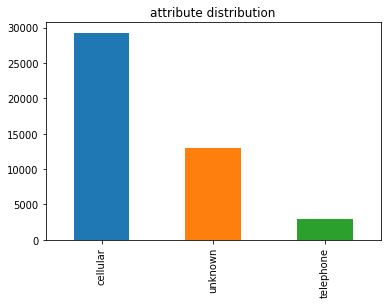

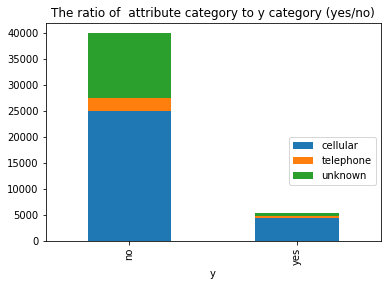

[Each column sums up to 1] 
y                no       yes
contact                      
cellular   0.624117  0.826054
telephone  0.063023  0.073738
unknown    0.312860  0.100208






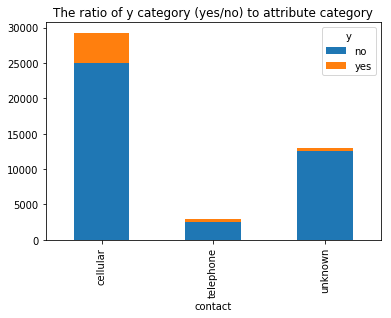

[Each row sums up to 1]
y                no       yes
contact                      
cellular   0.850811  0.149189
telephone  0.865795  0.134205
unknown    0.959293  0.040707


In [33]:
plot(bank.contact)

#### With the information above, the clients who are contacted by cell phone are more willing to subscibe the product
---

### Explore the month attribute


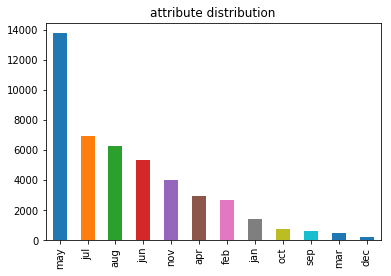

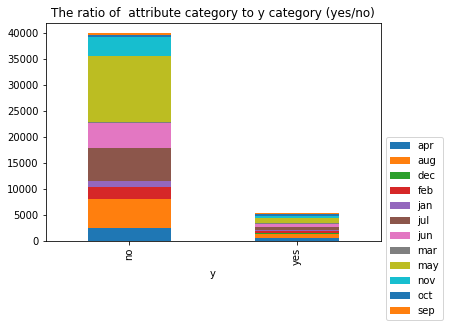

[Each column sums up to 1] 
y            no       yes
month                    
apr    0.058990  0.109094
aug    0.139247  0.130081
dec    0.002856  0.018907
feb    0.055308  0.083381
jan    0.031587  0.026848
jul    0.157006  0.118548
jun    0.120109  0.103233
mar    0.005736  0.046890
may    0.321652  0.174891
nov    0.089349  0.076196
oct    0.010395  0.061070
sep    0.007765  0.050860






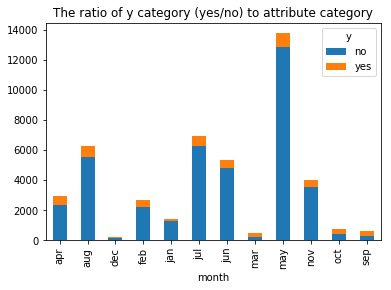

[Each row sums up to 1]
y            no       yes
month                    
apr    0.803206  0.196794
aug    0.889867  0.110133
dec    0.532710  0.467290
feb    0.833522  0.166478
jan    0.898788  0.101212
jul    0.909065  0.090935
jun    0.897772  0.102228
mar    0.480084  0.519916
may    0.932805  0.067195
nov    0.898489  0.101511
oct    0.562331  0.437669
sep    0.535406  0.464594


In [34]:
plot(bank.month)

#### By looking at the attribute distribution plot(the first plot), we learn that May, July, and August are the top 3 months that the majority of clients are last contacted. With no surprise, these 3 months also have the highest proportion for the clients to subscribe the product (the second plot). Therefore, we have to consider the yes and no distribution corresponding to each category (The third plot), according to the plot and quantitative table, March, December, and September have the highest rates for the clients to subscribe the product.
---

### Explore the outcome of the previous marketing campaign attribute

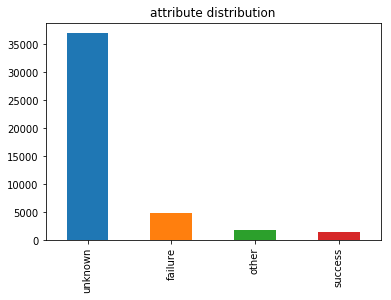

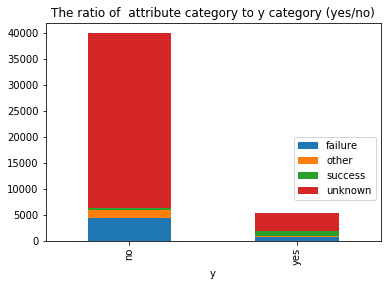

[Each column sums up to 1] 
y               no       yes
poutcome                    
failure   0.107284  0.116846
other     0.038400  0.058045
success   0.013351  0.184912
unknown   0.840965  0.640197






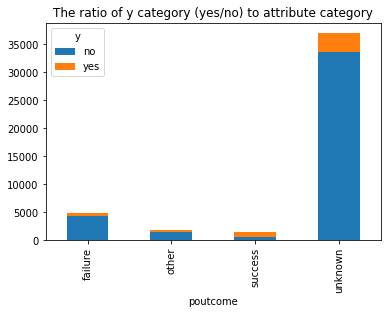

[Each row sums up to 1]
y               no       yes
poutcome                    
failure   0.873903  0.126097
other     0.833152  0.166848
success   0.352747  0.647253
unknown   0.908385  0.091615


In [35]:
plot(bank.poutcome)

#### By looking at the attribute distribution (the first plot), we learn that the majority category is the unknown, which suggests that some of the clients might not want to reveal this information. If we look at the distribution for the clients who subscribe to the product, the unknown and success are the top two categories. But when looking at the yes/no distribution corresponded to the category, the success category, and the other category are the top 2 groups among all. 
----

### 3. Remove Outliers for Numerical Attributes
We calculated the IQR for each attribute and removed the observation that are less than 3xIQR from value at 25% quartile and larger than 3xIQR from value at 75% quartile. 

*Note that pdays= -1 is a place holder that means client was not previous contact 
    

In [625]:
# remove rows that contains outliers for numerical variables

Q1=bank[["age","balance","day","duration","pdays","previous"]].describe().T["25%"]
Q3=bank[["age","balance","day","duration","pdays","previous"]].describe().T["75%"].T
IQR=(Q3-Q1)

bank[bank.age<(Q1.age - 3 * IQR.age)] 
bank.drop(bank[bank.age>(Q3.age + 3  * IQR.age)].index,inplace=True) 

bank.drop(bank[bank.balance<(Q1.balance-3 * IQR.balance)].index,inplace=True) 
bank.drop(bank[bank.balance>(Q3.balance + 3  * IQR.balance)].index,inplace=True) 

bank.drop(bank[bank.duration<(Q1.duration-3  * IQR.duration)].index,inplace=True) 
bank.drop(bank[bank.duration>(Q1.duration+3  * IQR.duration)].index,inplace=True) 

bank.drop(bank[bank.pdays<(Q1.pdays-3 * IQR.pdays)].index,inplace=True)   
bank.drop(bank[bank.pdays>(Q3.pdays + 3 * IQR.pdays)].index,inplace=True) 

bank.drop(bank[bank.previous<(Q1.previous-3  * IQR.previous)].index,inplace=True)   
bank.drop(bank[bank.previous>(Q3.previous + 3 * IQR.previous)].index,inplace=True) 

#33242 instances left

### 4.Replace the "unknow" Category Placeholder with the Mode value

For some categorical attributes such as job, education, and contact since their unknown category is the minority among all other categories for these attribute, we replaced the unknown placeholder with the mode category for that attribute.

In [626]:
#replace mode with unknown place holder

bank.job.replace("unknown",bank.job.mode() [0],inplace=True)
bank.education.replace("unknown",bank.education.mode() [0],inplace=True)
bank.contact.replace("unknown",bank.contact.mode() [0],inplace=True)
bank.poutcome.replace("unknown","pending",inplace=True)
bank.poutcome.replace("other","pending",inplace=True)

### 5.Data Transformation
For this dataset, there are 17 features originally, 7 of them are numerical variables and the rest are categorical variables. We first transformed the categorical variables into dummy variables, for which it gives us 46 features in total, then we used MinMaxScaler function from sklearn module to normalize all the features.

In [881]:
#transform data and normalize the data

bank_data=bank.drop(bank[["y"]],axis=1)
bank_data=pd.get_dummies(bank_data)

target=bank[["y"]]
target.replace("yes",1,inplace=True)
target.replace("no",0,inplace=True)

bank_table=pd.concat([bank_data,target],axis=1)

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
bank_data_normal=scaler.fit_transform(bank_table)

target_split=bank_data_normal[:,-1]
xdata_split=bank_data_normal[:,:-1]

C:\Anacon\envs\py27\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anacon\envs\py27\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### 6.Split the clean data into 80/20 for future model building

In [883]:
#split the clean data for model building
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(xdata_split,target_split,test_size=0.2, random_state=100)
#X_train.to_csv("X_train")
# X_test.to_csv("X_test")
#y_train.to_csv("y_train")
#y_test .to_csv("y_test ")
#target .to_csv("target")